## Email Spam Detection

**import dependencies**

In [2]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riyad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\riyad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\riyad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Download The Dataset**

In [3]:
data = pd.read_csv("spam.csv", encoding = 'latin1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [4]:
data.head(7)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...


In [5]:
data.shape

(5572, 2)

**removing duplicates & empty spaces & arranging the data**

In [6]:
data=data.dropna(axis =1)
data=data.drop_duplicates()
data['message']=data['message'].str.lower()
data['message']=data['message'].str.replace('[^a-zA-Z ]', '', regex=True)
data['message']=data['message'].str.strip()
#print(data.head(7))
data['message']=data['message'].str.replace(r'\s+',' ',regex=True)
data=data.dropna()

In [7]:
data.shape

(5169, 2)

In [8]:
data['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

**Plotting the Statistical Graph of the Data** 

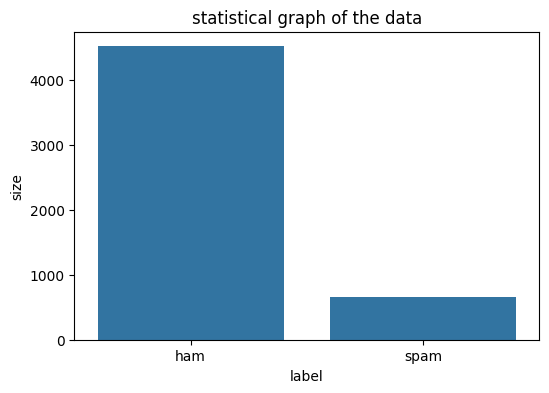

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=data)
plt.title("statistical graph of the data")
plt.xlabel("label")
plt.ylabel("size")
plt.show()

**processing the text of the data**

In [10]:
def clean_text(text):
    tokens = word_tokenize(text)

    stop_words=set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)


data['cleaned_text'] = data['message'].apply(clean_text)

In [11]:
data.head()

,label,message,cleaned_text
0,ham,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,nah i dont think he goes to usf he lives aroun...,nah dont think go usf life around though


**Encoding the labels**

In [12]:
le = LabelEncoder()
data['label_num'] = le.fit_transform(data['label'])

**Splitting into Train & Test Data**

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(data['cleaned_text'], data['label_num'], test_size = 0.2, random_state = 42)


**Counting Word Frequency & Extracting Features**

In [14]:
tfv = TfidfVectorizer(max_features=5000)
x_train_vec= tfv.fit_transform(X_train)
x_test_vec = tfv.transform(X_test)

In [15]:
print(data['label_num'])

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label_num, Length: 5169, dtype: int64


**Finding the best aplha value**

In [16]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(x_train_vec, Y_train)
    temp_y_pred = temp_classifier.predict(x_test_vec)
    score = accuracy_score(Y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.0 is: 94.58%
Accuracy score for alpha=0.1 is: 97.78%
Accuracy score for alpha=0.2 is: 97.49%
Accuracy score for alpha=0.3 is: 97.39%
Accuracy score for alpha=0.4 is: 97.49%
Accuracy score for alpha=0.5 is: 97.2%
Accuracy score for alpha=0.6 is: 97.2%
Accuracy score for alpha=0.7 is: 97.1%
Accuracy score for alpha=0.8 is: 96.81%
Accuracy score for alpha=0.9 is: 96.81%
Accuracy score for alpha=1.0 is: 96.71%
--------------------------------------------
The best accuracy is 97.78% with alpha value as 0.1


c:\Users\riyad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


**Train the model with naive bayes**


In [17]:
model = MultinomialNB(alpha=0.1)
model.fit(x_train_vec, Y_train)

,alpha,0.1
,force_alpha,True
,fit_prior,True
,class_prior,None


**predict**

In [18]:
Y_pred_nb = model.predict(x_test_vec)

**evaluate the model**

In [19]:
print(accuracy_score(Y_test, Y_pred_nb))
print(confusion_matrix(Y_test, Y_pred_nb))
print(classification_report(Y_test, Y_pred_nb))

0.9777562862669246
[[884   5]
 [ 18 127]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.96      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



**train & predict with logistic regression**

In [20]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_vec, Y_train)
Y_pred = log_reg.predict(x_test_vec)

**evaluation of log_reg**

In [21]:
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.9526112185686654
[[881   8]
 [ 41 104]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       889
           1       0.93      0.72      0.81       145

    accuracy                           0.95      1034
   macro avg       0.94      0.85      0.89      1034
weighted avg       0.95      0.95      0.95      1034



**train and predict with SVM**

In [22]:
sv_model = LinearSVC()
sv_model.fit(x_train_vec, Y_train)
Y_pred_svm = sv_model.predict(x_test_vec)

**Evaluation of SVM**

In [23]:
print("Accuracy:", accuracy_score(Y_test, Y_pred_svm))
print(confusion_matrix(Y_test, Y_pred_svm))
print(classification_report(Y_test, Y_pred_svm))

Accuracy: 0.9787234042553191
[[884   5]
 [ 17 128]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.96      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



**tuning the SVM model**

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(
    LinearSVC(), param_grid,
    cv = 5,
    scoring = 'f1',
    n_jobs=-1
)

grid.fit(x_train_vec, Y_train)
best_svm = grid.best_estimator_

#direct prediction
Y_pred_tunedsvm = best_svm.predict(x_test_vec)

**compare the default v/s tuned**

In [25]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score
)
svm_default_scores = {
    "Model": "SVM (Default)",
    "Accuracy": accuracy_score(Y_test, Y_pred_svm),
   "precision": precision_score(Y_test, Y_pred_svm),
   "recall": recall_score(Y_test, Y_pred_svm),
   "f1": f1_score(Y_test, Y_pred_svm)  
}

svm_tuned_scores = {
    "Model": "SVM (Tuned)",
    "Accuracy": accuracy_score(Y_test, Y_pred_tunedsvm),
    "precision": precision_score(Y_test, Y_pred_tunedsvm),
    "recall": recall_score(Y_test, Y_pred_tunedsvm),
    "f1": f1_score(Y_test, Y_pred_tunedsvm)   
}

results = pd.DataFrame([
    svm_default_scores,
    svm_tuned_scores
])
results

,Model,Accuracy,precision,recall,f1
0,SVM (Default),0.978723,0.962406,0.882759,0.920863
1,SVM (Tuned),0.978723,0.962406,0.882759,0.920863


**import and train with lightgbm**

In [26]:
import lightgbm as lgb 
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier( objective ='binary', n_estimators = 200, learning_rate=0.1, random_state=42)
lgbm.fit(x_train_vec, Y_train)

[LightGBM] [Info] Number of positive: 508, number of negative: 3627
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6205
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 342
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122854 -> initscore=-1.965680
[LightGBM] [Info] Start training from score -1.965680


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,200
,subsample_for_bin,200000
,objective,'binary'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


**tuning the lightgbm**

In [27]:
para_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'earning_rate': [0.05, 0.1],
    'max_depth': [-1, 10, 20],
    'num_leaves': [31, 50]
}

grid_lgbm = GridSearchCV(
    LGBMClassifier(
        objective ='binary', random_state = 42),
        para_grid_lgbm, cv = 3, scoring = 'f1', n_jobs = -1
)

grid_lgbm.fit(x_train_vec, Y_train)
best_lgbm = grid_lgbm.best_estimator_

#direct_prediction
Y_pred_lgbm = best_lgbm.predict(x_test_vec)


[LightGBM] [Warning] Unknown parameter: earning_rate
[LightGBM] [Warning] Unknown parameter: earning_rate
[LightGBM] [Info] Number of positive: 508, number of negative: 3627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6205
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 342
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122854 -> initscore=-1.965680
[LightGBM] [Info] Start training from score -1.965680
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter:

c:\Users\riyad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


**evaluation of lightgbm**

In [28]:
print("Accuracy:", accuracy_score(Y_test, Y_pred_lgbm))
print("precision:", precision_score(Y_test, Y_pred_lgbm))
print("recall:", recall_score(Y_test, Y_pred_lgbm))
print("f1:", f1_score(Y_test, Y_pred_lgbm))

Accuracy: 0.9671179883945842
precision: 0.9512195121951219
recall: 0.8068965517241379
f1: 0.8731343283582089


**prepare data for deep learning**

In [29]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#tokenize
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

#padding
max_len = 100

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

c:\Users\riyad\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


**building the LSTM model**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=20000, output_dim=128),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

**compile the LSTM**

In [31]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

**train with LSTM**

In [55]:
history = model.fit(
    X_train_pad,
    Y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8733 - loss: 0.3864 - val_accuracy: 0.8924 - val_loss: 0.3451
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8733 - loss: 0.3855 - val_accuracy: 0.8924 - val_loss: 0.3461
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8733 - loss: 0.3838 - val_accuracy: 0.8924 - val_loss: 0.3443
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8733 - loss: 0.3832 - val_accuracy: 0.8924 - val_loss: 0.3447
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8733 - loss: 0.3857 - val_accuracy: 0.8924 - val_loss: 0.3430
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8733 - loss: 0.3863 - val_accuracy: 0.8924 - val_loss: 0.3434
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8733 - loss: 0.3838 - val_accuracy: 0.8924 - val_loss: 0.3439
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8733 - loss: 0.3851 - val_accuracy: 0.8924 - v

**evaluation**

In [67]:
Y_pred_prob = model.predict(X_test_pad)
Y_pred_dl = (Y_pred_prob > 0.2).astype(int)

print("Precision:", precision_score(Y_test, Y_pred_dl, zero_division=0))
print("Recall:", recall_score(Y_test, Y_pred_dl, zero_division=0))
print("F1:", f1_score(Y_test, Y_pred_dl, zero_division=0))
print("confusion_matrix:", confusion_matrix(Y_test, Y_pred_dl))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Precision: 0.0
Recall: 0.0
F1: 0.0
confusion_matrix: [[889   0]
 [145   0]]


**compare ML v/s DL**

In [68]:
nb_scores = {
    "Model": "NB (Tuned)",
    "Accuracy": accuracy_score(Y_test, Y_pred_nb),
   "precision": precision_score(Y_test, Y_pred_nb),
   "recall": recall_score(Y_test, Y_pred_nb),
   "f1": f1_score(Y_test, Y_pred_nb)  
}

log_reg_scores = {
    "Model": "Logistic Regression (Default)",
    "Accuracy": accuracy_score(Y_test, Y_pred),
   "precision": precision_score(Y_test, Y_pred),
   "recall": recall_score(Y_test, Y_pred),
   "f1": f1_score(Y_test, Y_pred)  
}

lgbm_scores = {
    "Model": "LGBM (Tuned)",
    "Accuracy": accuracy_score(Y_test, Y_pred_lgbm),
   "precision": precision_score(Y_test, Y_pred_lgbm),
   "recall": recall_score(Y_test, Y_pred_lgbm),
   "f1": f1_score(Y_test, Y_pred_lgbm)  
}

lstm_scores = {
    "Model": "LSTM (Default)",
    "Accuracy": accuracy_score(Y_test, Y_pred_dl),
   "precision": precision_score(Y_test, Y_pred_dl),
   "recall": recall_score(Y_test, Y_pred_dl),
   "f1": f1_score(Y_test, Y_pred_dl)  
}


results = pd.DataFrame([
    nb_scores,
    log_reg_scores,
    svm_tuned_scores,
    lgbm_scores,
    lstm_scores

])
results

c:\Users\riyad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,Model,Accuracy,precision,recall,f1
0,NB (Tuned),0.977756,0.962121,0.875862,0.916968
1,Logistic Regression (Default),0.952611,0.928571,0.717241,0.809339
2,SVM (Tuned),0.978723,0.962406,0.882759,0.920863
3,LGBM (Tuned),0.967118,0.951220,0.806897,0.873134
4,LSTM (Default),0.859768,0.000000,0.000000,0.000000


**ROC-AUC Curve of LSTM**

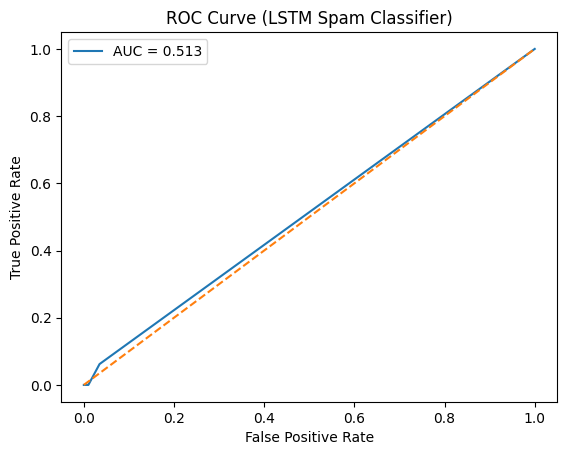

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_LSTM, tpr_LSTM, _ = roc_curve(Y_test, Y_pred_prob)
auc_LSTM = roc_auc_score(Y_test, Y_pred_prob)

plt.figure()
plt.plot(fpr_LSTM, tpr_LSTM, label=f"AUC = {auc_LSTM:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (LSTM Spam Classifier)")
plt.legend()
plt.show()

**ROC-AUC Curve of SVM**

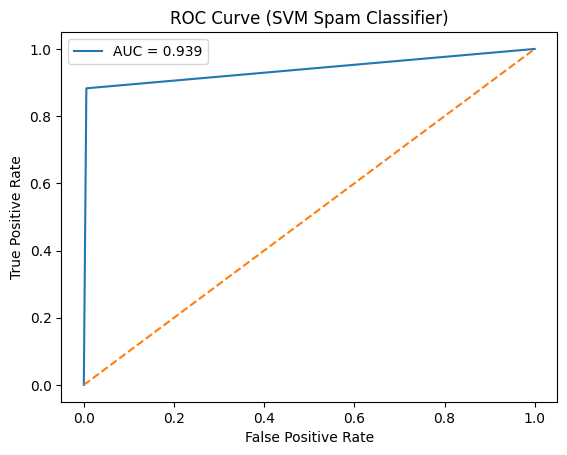

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_SVM, tpr_SVM, _ = roc_curve(Y_test, Y_pred_tunedsvm)
auc_SVM = roc_auc_score(Y_test, Y_pred_tunedsvm)

plt.figure()
plt.plot(fpr_SVM, tpr_SVM, label=f"AUC = {auc_SVM:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SVM Spam Classifier)")
plt.legend()
plt.show()

**comparison of the curves**

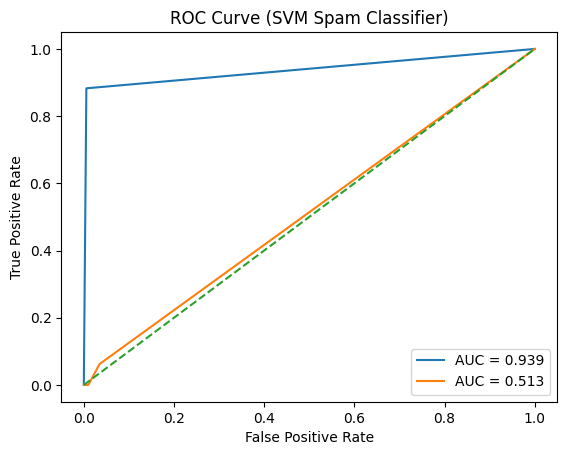

In [71]:
plt.figure()
plt.plot(fpr_SVM, tpr_SVM, label=f"AUC = {auc_SVM:.3f}")
plt.plot(fpr_LSTM, tpr_LSTM, label=f"AUC = {auc_LSTM:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SVM Spam Classifier)")
plt.legend()
plt.show()